In [137]:
import numpy as np
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [138]:
digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

array([ 0, 39, 32, 56, 24, 31, 16,  8, 48, 40, 47, 23, 15,  7, 55, 57,  1,
       63, 49,  6, 41, 22,  9, 14, 25, 33, 17, 62, 30, 38,  3, 11, 59,  4,
       46, 60,  2, 12, 54, 58, 51, 52, 10, 18,  5, 50, 45, 19, 36, 37, 29,
       27, 61, 53, 28, 13, 26, 20, 21, 35, 44, 34, 43, 42])

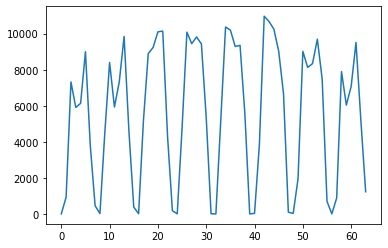

In [139]:
## Calculate which pixels change value the most

# calculate average for each pixel
average = np.average(data,axis=0)

# calculate difference of standard for each image
standard_dev = data - average
standard_dev = np.abs(standard_dev)

# sum up deviations from standard for each pixel
sum_of_deviations = np.sum(standard_dev,axis=0)

plt.plot(range(64), sum_of_deviations)

np.argsort(sum_of_deviations)

In [140]:
def optimizeFeature(x):
    return np.array([x[42], x[34]])

In [141]:
def d(x1, x2):
    x1 = optimizeFeature(x1)
    x2 = optimizeFeature(x2)
    return np.sqrt(np.sum((x1 - x2)**2))

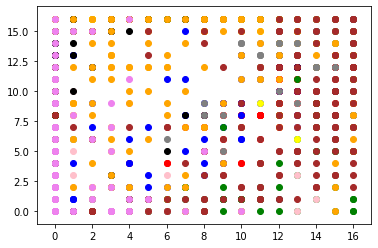

In [142]:
newData = np.array([optimizeFeature(x) for x in data])
colors = ["red", "blue", "green", "pink", "yellow", "black", "grey", "orange", "brown", "violet"]

for k in range(10):
    data_k = newData[target == k]
    plt.scatter(data_k[:,0], data_k[:,1], color=colors[k])



In [143]:
# maybe vectorize => takes about 20 seconds now
D = np.empty((data.shape[0],data.shape[0]))
for idx1, elem1 in enumerate(data):
    for idx2, elem2 in enumerate(data):
        D[idx1,idx2] = d(elem1,elem2)

In [144]:
S = np.argsort(D)

In [145]:
def p(i, m, S, target):
    label = target[i]
    S_i = S[i][:m]
    TP = np.sum(target[S_i] == label)
    FP = np.sum(target[S_i] != label)
    N_i = np.sum(target == label)
    precision = TP / (TP + FP)
    recall = TP / N_i
    return precision, recall

In [146]:
def Prec_Rec_Avg(precFunc):
    # vectorize? => takes about 2min
    P = np.empty((data.shape[0],data.shape[0]))
    R = np.empty((data.shape[0],data.shape[0]))
    for idx1 in range(data.shape[0]):
        for idx2 in range(data.shape[0]):
            precision, recall = precFunc(idx1, idx2+1, S, target)
            P[idx1, idx2] = precision
            R[idx1, idx2] = recall

    P_avg = []
    R_avg = []
    for k in range(10):
        ktargets = np.where(target == k)
        kprecisions = P[ktargets]
        P_avg.append(np.average(kprecisions, axis=0))

        krecall= R[ktargets]
        R_avg.append(np.average(krecall, axis=0))
    
    return P_avg, R_avg

In [147]:
P_avg, R_avg = Prec_Rec_Avg(p)

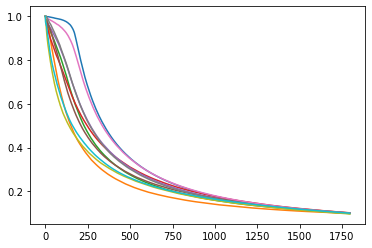

In [ ]:
for k in range(10):
    plt.plot(range(1797), P_avg[k])

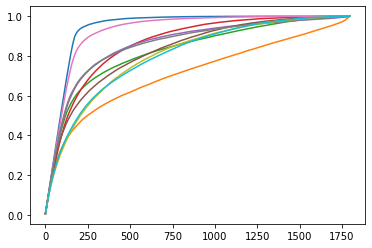

In [ ]:
for k in range(10):
    plt.plot(range(1797), R_avg[k])

In [ ]:
for k in range(10):
    print(np.trapz(P_avg[k], x=range(1797)))

577.2534505314467
401.15712968773374
470.94087108915767
496.15251863067164
505.1090221834134
471.00936992838155
565.3062806546463
501.6663047871904
417.37382506206404
433.8449333966664


In [ ]:
for k in range(10):
    print(np.trapz(R_avg[k], x=range(1797)))

1692.7441610907717
1277.56478686149
1483.6242778256574
1550.7520977037234
1543.069930710295
1485.141438232097
1663.7642623851518
1539.8764395618118
1443.4340731932884
1441.0383950617281


In [ ]:
def pg(i, m, S, target):
    label = target[i]
    prec, recall = p(i, m, S, target)
    N_i = np.sum(target == label)
    N = target.size
    precGain = max(0, ((N / N_i) - (1 / prec)) / ((N / N_i) - 1))
    precRecall = max(0, ((N / N_i) - (1 / recall) / ((N / N_i) - 1)))
    return precGain, precRecall

    

In [ ]:
P_avg, R_avg = Prec_Rec_Avg(pg)

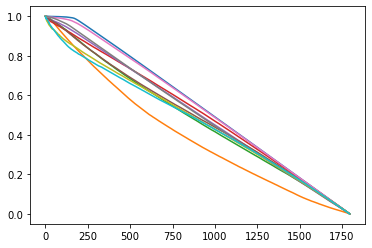

In [ ]:
for k in range(10):
    plt.plot(range(1797), P_avg[k])

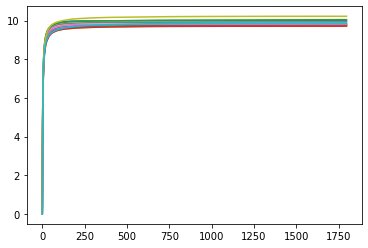

In [ ]:
for k in range(10):
    plt.plot(range(1797), R_avg[k])

In [ ]:
for k in range(10):
    print(np.trapz(P_avg[k], x=range(1797)))

982.7561460351778
716.8644254618142
864.8155029883762
923.1891154356942
912.1360895174952
883.4586078736401
973.7237782051833
913.1244272322175
856.3950662038898
846.2767370675939


In [ ]:
for k in range(10):
    print(np.trapz(R_avg[k], x=range(1797)))

17852.7186724544
17345.77471456516
17905.271017437502
17304.431307843042
17502.109801889143
17392.878891178832
17538.63879892308
17721.283355896456
18202.214700911667
17554.82207565927
